# Analisando O índice de Desistência de Alunos Solteiros

O intuito desse projeto é validar técnicas de EDA e aperfeiçoar a abordagem descritiva. Buscarei entender neste dataset se:

- Há correlação entre a taxa de inflação com numero de desistência de alunos?
- O período que o aluno estuda influência no término da sua formação?


O intuíto deste projeto é entender os diferentes tipos de correlção entre as caracteristicas de alunos que levam ao sucesso ou ao abandono da sua gradução.

In [96]:
#Imports necessários 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
#Carregando e visualizando dataset

df = pd.read_csv('Data.csv', sep = ";")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# 1. Abordagem Univariada
vamos analisar isoladamente algumas variaveis para começar a compreender nosso problema.

In [22]:
# Entendendo distribuição de média de alunos por tipo['Target'] sendo estes tipos: Graduados, Desistentes e Novos Inscritos

df["Target"].value_counts(1)

Target
Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: proportion, dtype: float64

In [23]:
#Analisando índice de inflação por Target, será que a inflação pode ter influência sobre a desistência dos alunos? 

df.groupby('Target')['Inflation rate'].mean()

Target
Dropout     1.283955
Enrolled    1.211713
Graduate    1.197918
Name: Inflation rate, dtype: float64

# 2. Abordagem Bivariada com Pivot_Table (Tabela Dinâmica do Excel) .

In [24]:
#Entendo a distribuição da média de inflação registrada pelo status civil do aluno.
#Será que um divórcio influência na permanência de um aluno na graduação?

df.pivot_table(index = 'Target', columns = ['Marital status'], values= 'Inflation rate', aggfunc = np.mean)

Marital status,1,2,3,4,5,6
Target,,,,,,
Dropout,1.282601,1.300559,1.40,1.269048,1.354545,0.875
Enrolled,1.220694,1.003846,2.55,1.593750,-0.333333,1.400
Graduate,1.193499,1.216216,-0.80,1.163636,2.181818,-0.300


In [25]:
#Agora buscamos uma percpação ainda mais além: Será que o período de estudo do aluno (a) mais seu estado civil, influencia 
#em suas notas?

df.pivot_table(index = 'Target', columns =
               ['Daytime/evening attendance\t',
                'Marital status'], 
               values = 'Previous qualification (grade)',
               aggfunc = np.mean
              )

Daytime/evening attendance	           0                                        \
Marital status                        1           2      3           4      5   
Target                                                                          
Dropout                      128.471774  130.476471    NaN  127.733333  120.0   
Enrolled                     128.863415  133.296000    NaN  135.400000    NaN   
Graduate                     132.313333  131.133784  120.0  138.388235  120.0   

Daytime/evening attendance	                  1                                 \
Marital status                   6           1           2      3           4   
Target                                                                          
Dropout                      122.5  131.537736  129.937838  135.0  130.753333   
Enrolled                     133.1  131.172607  129.177778  154.0  137.412500   
Graduate                     133.1  134.495393  130.505405    NaN  126.593750   

Daytime/evening attendance	                   
Marital status                      5      6  
Target                                        
Dropout                      143.5500  133.1  
Enrolled                     128.7000    NaN  
Graduate                     132.1375    NaN

In [45]:
#Vamos facilitar a comopreensão desta análise aplicando uma formatação condicional ao dataframe para identificar os valores
#maxímos e minímos de cada target por período para suas respectivas notas 

pivot_df = df.pivot_table(index = 'Marital status', columns =
               ['Target','Daytime/evening attendance\t'], 
               values = 'Previous qualification (grade)',
               aggfunc = np.mean
              )

def format_cond1(data):
    styles = data.copy()
    for col in data.columns:
        max_val = data[col].max()
        min_val = data[col].min()
        styles[col] = ['background-color: lightgreen' if v == max_val else 'background-color: yellow'
                        if v == min_val else '' for v in data[col]
                      ]
    return styles
    
styled_df = pivot_df.style.apply(format_cond1, axis=None)
display(styled_df)

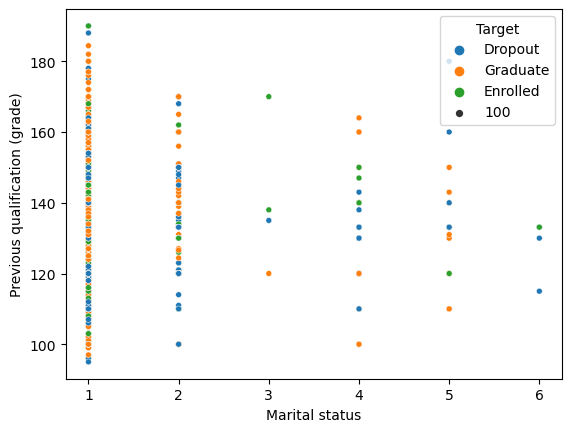

In [47]:
#Para entender a distribuição de alunos por target, vamos usar um scatterplot. Observamos que a grande maioria dos alunos são
#solteiros. Vamos entender melhor essa varável.

_= sns.scatterplot(x='Marital status', y='Previous qualification (grade)',size =100,hue = 'Target', data=df)

In [49]:
#Vamos separar o Target 1 para uma análise mais aprofundada sobre os alunos solteiros

df_target1 = df[df['Marital status'] ==1]
df_target1.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate


Target
Graduate    2015
Dropout     1184
Enrolled     720
Name: count, dtype: int64

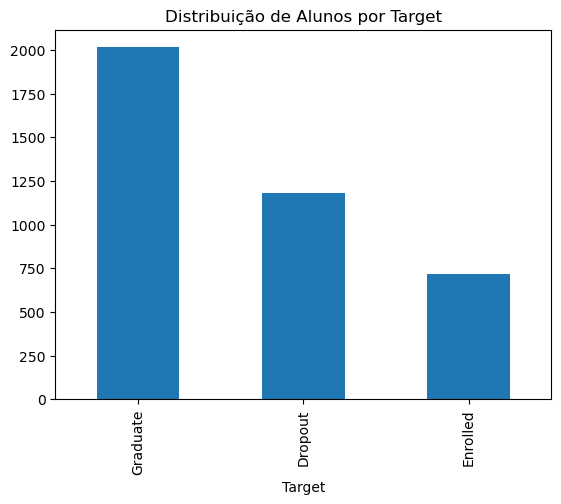

In [53]:
#Podemos enxergar de modo preciso a distribuição de alunos solteiros entre as 3 categorias do nosso Target

_= df_target1.Target.value_counts().plot.bar()
_= plt.title("Distribuição de Alunos Solteitos por Target")
df_target1.Target.value_counts()

C:\Users\Leo\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\Leo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


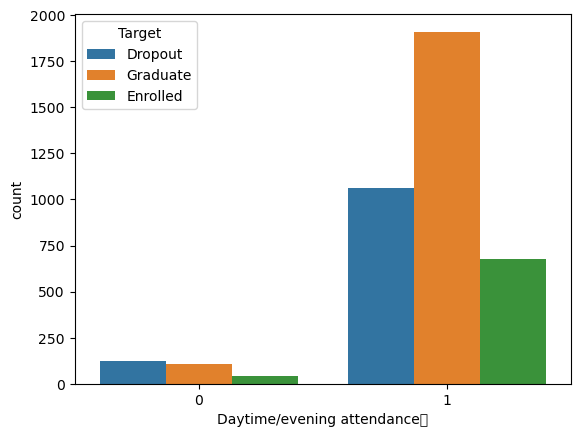

In [57]:
#Analisando o gráfico abaixo podemos ver que a maioria de alunos graduados e desistentes estudam no período diurno
sns.countplot(x='Daytime/evening attendance\t', hue='Target', data=df_target1);

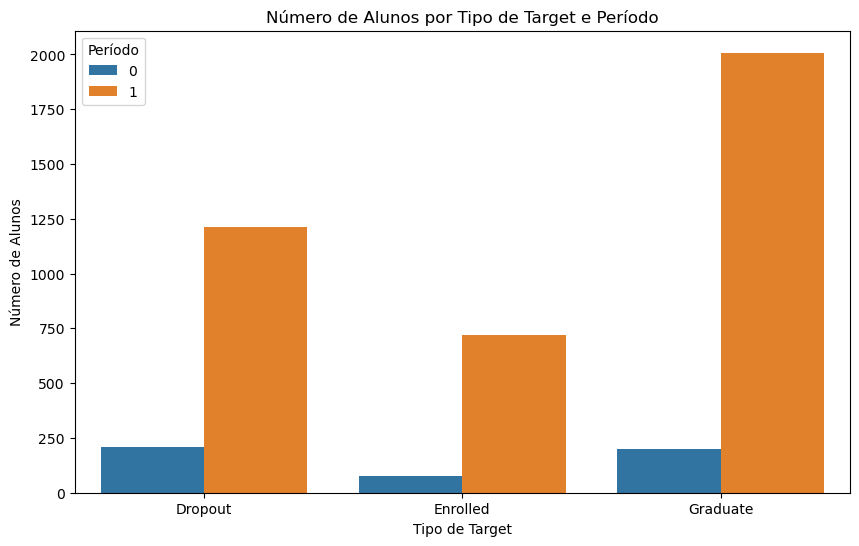

In [59]:
# Validando a ultima análise sobre alunos do período diurno usando a função groupby para agrupar
#os dados por 'Target' e 'Periodo', e contando o número de ocorrências em cada grupo

alunos_por_tipo_periodo = df.groupby(['Target', 'Daytime/evening attendance\t']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=alunos_por_tipo_periodo, x='Target', y='Count', hue='Daytime/evening attendance\t')
plt.title('Número de Alunos por Tipo de Target e Período')
plt.xlabel('Tipo de Target')
plt.ylabel('Número de Alunos')
plt.legend(title='Período')
plt.show()


# 3 . Por fim, Há Correlação Entre o Ídice de Desemprego e Alunos Solteiros Desistentes?

- Após transitar entre as análises uni e bivariadas, separei a categoria dos solteiros para realizar uma análise sobre os tipos de alunos presentes nessa classe, já que a maioria dos estudantes se enquadram nessa categoria.

In [102]:
#Verifcando a correlação entre alunos solteiros desistentes e índice de desemprego

correlation_inflacao_desistencia = df_target1['Inflation rate'].corr(df_target1['Target']=='Dropout')
print(f"Correlação entre Índice de Inflação e Desistência: {correlation_inflacao_desistencia}")


Correlação entre Índice de Inflação e Desistência: 0.02748076070949143


C:\Users\Leo\AppData\Local\Temp\ipykernel_2700\680120926.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Target', y='Inflation rate', data=df_target1, ci=None)


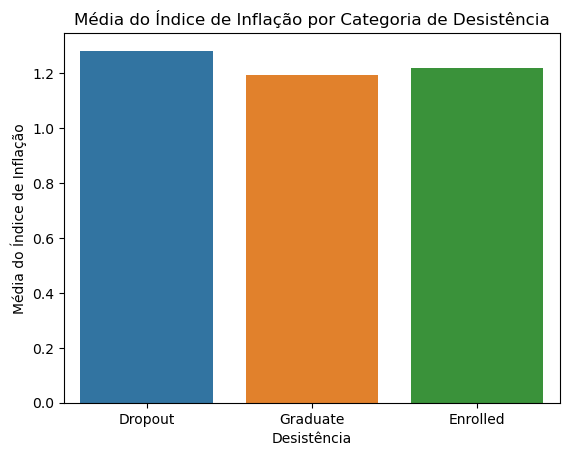

In [104]:
#Por fim, vamos visualizar a média da inflação por tipo de Target

sns.barplot(x='Target', y='Inflation rate', data=df_target1, ci=None)
plt.title('Média do Índice de Inflação por Categoria de Desistência')
plt.xlabel('Desistência')
plt.ylabel('Média do Índice de Inflação')
plt.show()

# 4 . Conclusão: O que descobri?


Pude concluir que de fato, o índice de inflação não interfere na decição do aluno de prosseguir ou não com a sua gradução. Mas é interessante observar que maioria dos alunos se concentram no período diurno o que sugere uma maior aceitação deste por esse perído que também concentra as maiores médias de notas, destacada no tópico 2.

<b> Os resultados alcançados mostram que a correlação entre a taxa de inlfação e alunos solteiros desistentes é próxima de zero, sugerindo uma fraca associação linear entre o índice de inflação e a desistência dos alunos. Isso significa que, com base na análise linear, as duas variáveis não têm uma relação forte. Mas é importante notar que uma correlação baixa não implica necessariamente falta de relação entre as variáveis o que sugere mais abordagens apartir de outras variaveispara novas conclusões.</b>